In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('DonaldTrump_facebook_comments1.csv')
df.head()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,comment_id,status_id,parent_id,comment_message,comment_author,comment_published,comment_likes
0,10159167535600725_10159167536690725,153080620724_10159167535600725,NaN,"""I just fired the head of the FBI. He was craz...",William Peterson,20/5/17 9:32,56
1,10159167535600725_10159167539020725,153080620724_10159167535600725,10159167535600725_10159167536690725,Correct....Comey the nut job,CJ Ayers,20/5/17 9:33,18
2,10159167535600725_10159167541255725,153080620724_10159167535600725,10159167535600725_10159167536690725,Our wonderful President is awesome unlike Huss...,George White,20/5/17 9:33,14
3,10159167535600725_10159167543000725,153080620724_10159167535600725,10159167535600725_10159167536690725,Correct. I would add destroying evidence.,Ion Marian,20/5/17 9:34,3
4,10159167535600725_10159167544205725,153080620724_10159167535600725,10159167535600725_10159167536690725,#maga,April Thomas Kimbrell,20/5/17 9:34,7


In [2]:
df.shape

(4247, 7)

In [3]:
#creating polarity variable 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus = []
for i in range(0, 4247):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df['comment_message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s = blob.sentiment.polarity
    corpus.append(blob_s)
    
corpus_sub = np.array(corpus)

polarity = pd.DataFrame(corpus_sub)

df['polarity'] = polarity


In [11]:
#creating polarity variable 

corpus = []
for i in range(0, 4247):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df['comment_message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s1 = blob.sentiment.subjectivity
    corpus.append(blob_s1)
    
corpus_sub1 = np.array(corpus)

subjectivity = pd.DataFrame(corpus_sub1)

df['subjectivity'] = subjectivity



In [12]:
#recoding polarity into 3 categories  

def days_late_xform(dl):
    if dl > 0.3: return 'Positive'
    elif -0.3 < dl <= 0.3: return 'Neutral'
    elif dl <= -0.3: return 'Negative'
    
df['polarity_r'] = df['polarity'].map(days_late_xform)


print df.polarity_r.value_counts()

Neutral     3082
Positive     839
Negative     326
Name: polarity_r, dtype: int64


In [14]:
#recoding subjectivity into 3 categories  

def days_late_xform1(dl):
    if dl > 0.5: return 'Positive'
    elif dl <= 0.5: return 'Negative'
    
df['subjectivity_r'] = df['subjectivity'].map(days_late_xform1)


print df.subjectivity_r.value_counts()

Negative    2991
Positive    1256
Name: subjectivity_r, dtype: int64


In [15]:
#what tweets are negative? 

pd.set_option('display.max_colwidth', -1)

s = df.loc[df['polarity_r'] == 'Negative']
print s['comment_message']

11      Where's the proof idiot                                                                                                                                                                                                                                                                     
13      Childish insults from Trumpsters...just like their Orange hero.....sad but predictable.\n\nhttps://www.nytimes.com/interactive/2016/01/28/upshot/donald-trump-twitter-insults.html?_r=0                                                                                                     
18      Comey said it never happened on May 3. Why did he change his mind by the 8th and think real hard.                                                                                                                                                                                           
37      Look at the people who hate on Trump...they are literally mentally ill. They run with those who normalize grown m

Clustering Trump's facebook posts: 
- What kind of facebook posts get the most reactions? Are they the ones that get the most comments too?


In [42]:
df2 = pd.read_csv('DonaldTrump_facebook_statuses.csv')

df2.head()

,status_id,status_message,link_name,status_type,status_link,permalink_url,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10159167535600725,"Incredible welcome to Riyadh, Saudi Arabia. Great day and looking forward to the evening ahead.",Photos from Donald J. Trump's post,photo,https://www.facebook.com/DonaldTrump/photos/a.488852220724.393301.153080620724/10159167522005725/?type=3,https://www.facebook.com/DonaldTrump/posts/10159167535600725,20/5/17 9:32,62535,4304,4010,56005,5220,359,749,30,174
1,153080620724_10159164014460725,"President Donald J. Trump's schedule for Saturday, May 20th (beginning 10AM AST/3AM EST):\nPresident Trump and First Lady Melania Trump arrive in Riyadh, Saudi Arabia \nRoyal Court Official Arrival Ceremony\nCoffee Ceremony and Presentation of the Collar of Abdulaziz Al Saud Medal\nRoyal Banquet Luncheon\nUnited States ��� Saudi Arabia bilateral meeting\nSigning Ceremony\nBilateral meeting with the Crown Prince of Saudi Arabia\nBilateral meeting with the Deputy Crown Prince of Saudi Arabia\nArrive at Murabba Palace and participate in the Welcome Ceremony\nReception with King Salman and members of the United States and Saudi delegations\nRoyal Banquet Dinner\nNational Museum Tour",NaN,status,NaN,https://www.facebook.com/DonaldTrump/posts/10159164014460725,19/5/17 19:00,24298,4130,1400,21340,2353,161,349,17,78
2,153080620724_10159164604675725,Very exciting trip ahead -- going to show the world that America is back!,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a.488852220724.393301.153080620724/10159164604675725/?type=3,https://www.facebook.com/DonaldTrump/posts/10159164604675725:0,19/5/17 17:12,76843,8316,3606,66573,8298,240,1541,37,154
3,153080620724_10159163952740725,This weekend I begin my first trip overseas as president ��� a trip with historic significance for the American people...,The White House,video,https://www.facebook.com/WhiteHouse/videos/1316808265073570/,https://www.facebook.com/DonaldTrump/posts/10159163952740725,19/5/17 14:47,74556,9124,5,63691,9415,143,1075,42,190
4,153080620724_10159163445280725,Great news! 'ICE Arrests Under Trump Jump 40% as Border Crossings Drop' fxn.ws/2qXuwAH,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a.488852220724.393301.153080620724/10159163445280725/?type=3,https://www.facebook.com/DonaldTrump/posts/10159163445280725:0,19/5/17 12:56,49275,3961,6061,42425,5815,269,535,39,192


In [43]:
feature_cols = ['num_reactions', 'num_comments']
X = df2[feature_cols]

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Fitting K-Means to the dataset

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
km = kmeans.fit_predict(X)


In [45]:
df2['cluster'] = kmeans.labels_
df2 = df2.sort('cluster')
print df2.groupby('cluster').std()




         num_reactions  num_comments    num_shares     num_likes  \
cluster                                                            
0        136170.660665  12281.410261  26875.955927  123445.91327   
1        49462.652567   3379.744517   5589.806973   44531.22838    
2        46148.092983   39312.235602  9259.018252   26690.79405    

            num_loves     num_wows    num_hahas     num_sads   num_angrys  
cluster                                                                    
0        16732.138746  1568.216822  5269.073163  6971.423814  7985.546193  
1        4480.672941   685.868792   1925.802949  1444.185584  1828.706920  
2        13633.469478  723.758247   1917.886858  479.717625   3846.871716  


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


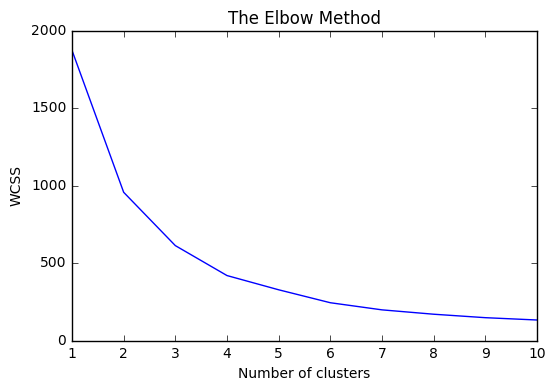

In [39]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


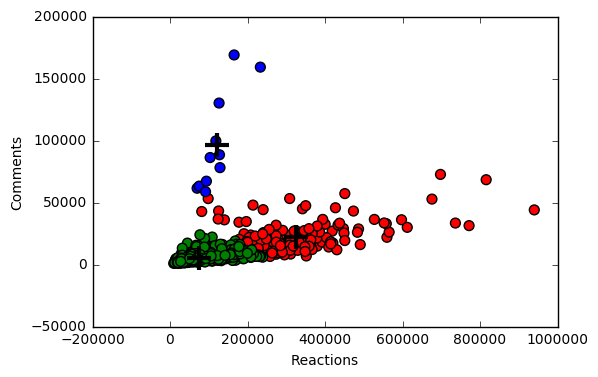

In [40]:
centers = df2.groupby('cluster').mean()

colors = np.array(['red', 'green', 'blue'])
colors = pd.Series(colors)

plt.scatter(df2.num_reactions, df2.num_comments, c=colors[df2.cluster], s=50)
plt.xlabel('Reactions')
plt.ylabel('Comments')

# cluster centers, marked by "+"
plt.scatter(centers.num_reactions, centers.num_comments, linewidths=3, marker='+', s=300, c='black')
#plt.show()

In [46]:
#comparatively low number of reactions, but high number of comments?


pd.set_option('display.max_colwidth', -1)

s = df2.loc[df2['cluster'] == 2]
print s['status_message']

872    Join me LIVE in Fayetteville, North Carolina!                                                              
901    Join me LIVE in Cincinnati, Ohio!                                                                          
698    Join me LIVE from Trump Tower!                                                                             
848    Join me LIVE in Grand Rapids, Michigan!                                                                    
850    Join me live in Louisiana! Tomorrow, we need you to go to the polls & send John Kennedy to the U.S. Senate.
809    Join me LIVE in Orlando, Florida!                                                                          
826    Join me LIVE in West Allis, Wisconsin!                                                                     
804    Join me LIVE in Mobile, Alabama for my final 2016 THANK YOU TOUR rally!                                    
855    Join me LIVE in Des Moines, Iowa!                                        